#CafChem tools for calling PubChem.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioCafiero/CafChem/blob/main/notebooks/Pubchem_CafChem.ipynb)

## This notebook allows you to:
- Call a compound object from Pubchem using SMILES
- view all available properties in the object
- get IUPAC and common names for a compound from SMILES
- Search for similar molecules
- Perform a substructure search

## Requirements:
- This notebook will install pubchem and rdkit. (should run on an enviroment with just these two libraries installed)
- Runs well on CPU.

## Install and import libraries

In [1]:
!pip install pubchempy
!pip install rdkit

In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, QED
from rdkit.Chem.Draw import MolsToGridImage
import re
import pubchempy as pcp

print("All libraries loaded!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 24.8 MB/s eta 0:00:00
All libraries loaded!


## Define a compound and list the properties that may be available from Pubchem

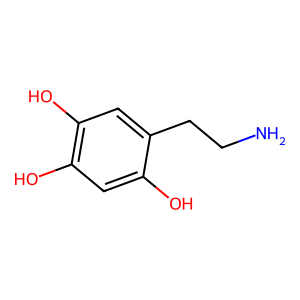

In [34]:
novel_compound = 'c1(O)cc(O)c(O)cc1CCN'
novel_mol = Chem.MolFromSmiles(novel_compound)
Draw.MolToImage(novel_mol)

In [28]:
compound_df = pcp.get_compounds(novel_compound, 'smiles', as_dataframe=True)
columns = compound_df.columns.tolist()
for column in columns:
  print(column)

elements
atoms
bonds
coordinate_type
charge
molecular_formula
molecular_weight
connectivity_smiles
smiles
inchi
inchikey
iupac_name
xlogp
exact_mass
monoisotopic_mass
tpsa
complexity
h_bond_donor_count
h_bond_acceptor_count
rotatable_bond_count
fingerprint
cactvs_fingerprint
heavy_atom_count
isotope_atom_count
atom_stereo_count
defined_atom_stereo_count
undefined_atom_stereo_count
bond_stereo_count
defined_bond_stereo_count
undefined_bond_stereo_count
covalent_unit_count
volume_3d
multipoles_3d
conformer_rmsd_3d
effective_rotor_count_3d
pharmacophore_features_3d
mmff94_partial_charges_3d
mmff94_energy_3d
conformer_id_3d
shape_selfoverlap_3d
feature_selfoverlap_3d
shape_fingerprint_3d


## get compound IUPAC and common names

In [36]:
compound_list = pcp.get_compounds(novel_compound, 'smiles', listkey_count=10)

if len(compound_list) == 1:
  print(compound_list[0].iupac_name)
  syn_list = pcp.get_synonyms(compound_list[0].cid)
  for alt_name in syn_list[0]['Synonym'][:5]:
    print(alt_name)
elif len(compound_list) > 1:
  print("Multiple compounds found!")
else:
  print("No compounds found!")

5-(2-aminoethyl)benzene-1,2,4-triol
oxidopamine
6-HYDROXYDOPAMINE
1199-18-4
5-(2-aminoethyl)benzene-1,2,4-triol
Oxidopamina


## Search for similar compounds

[13:42:54] WARNING: not removing hydrogen atom without neighbors
[13:42:54] WARNING: not removing hydrogen atom without neighbors


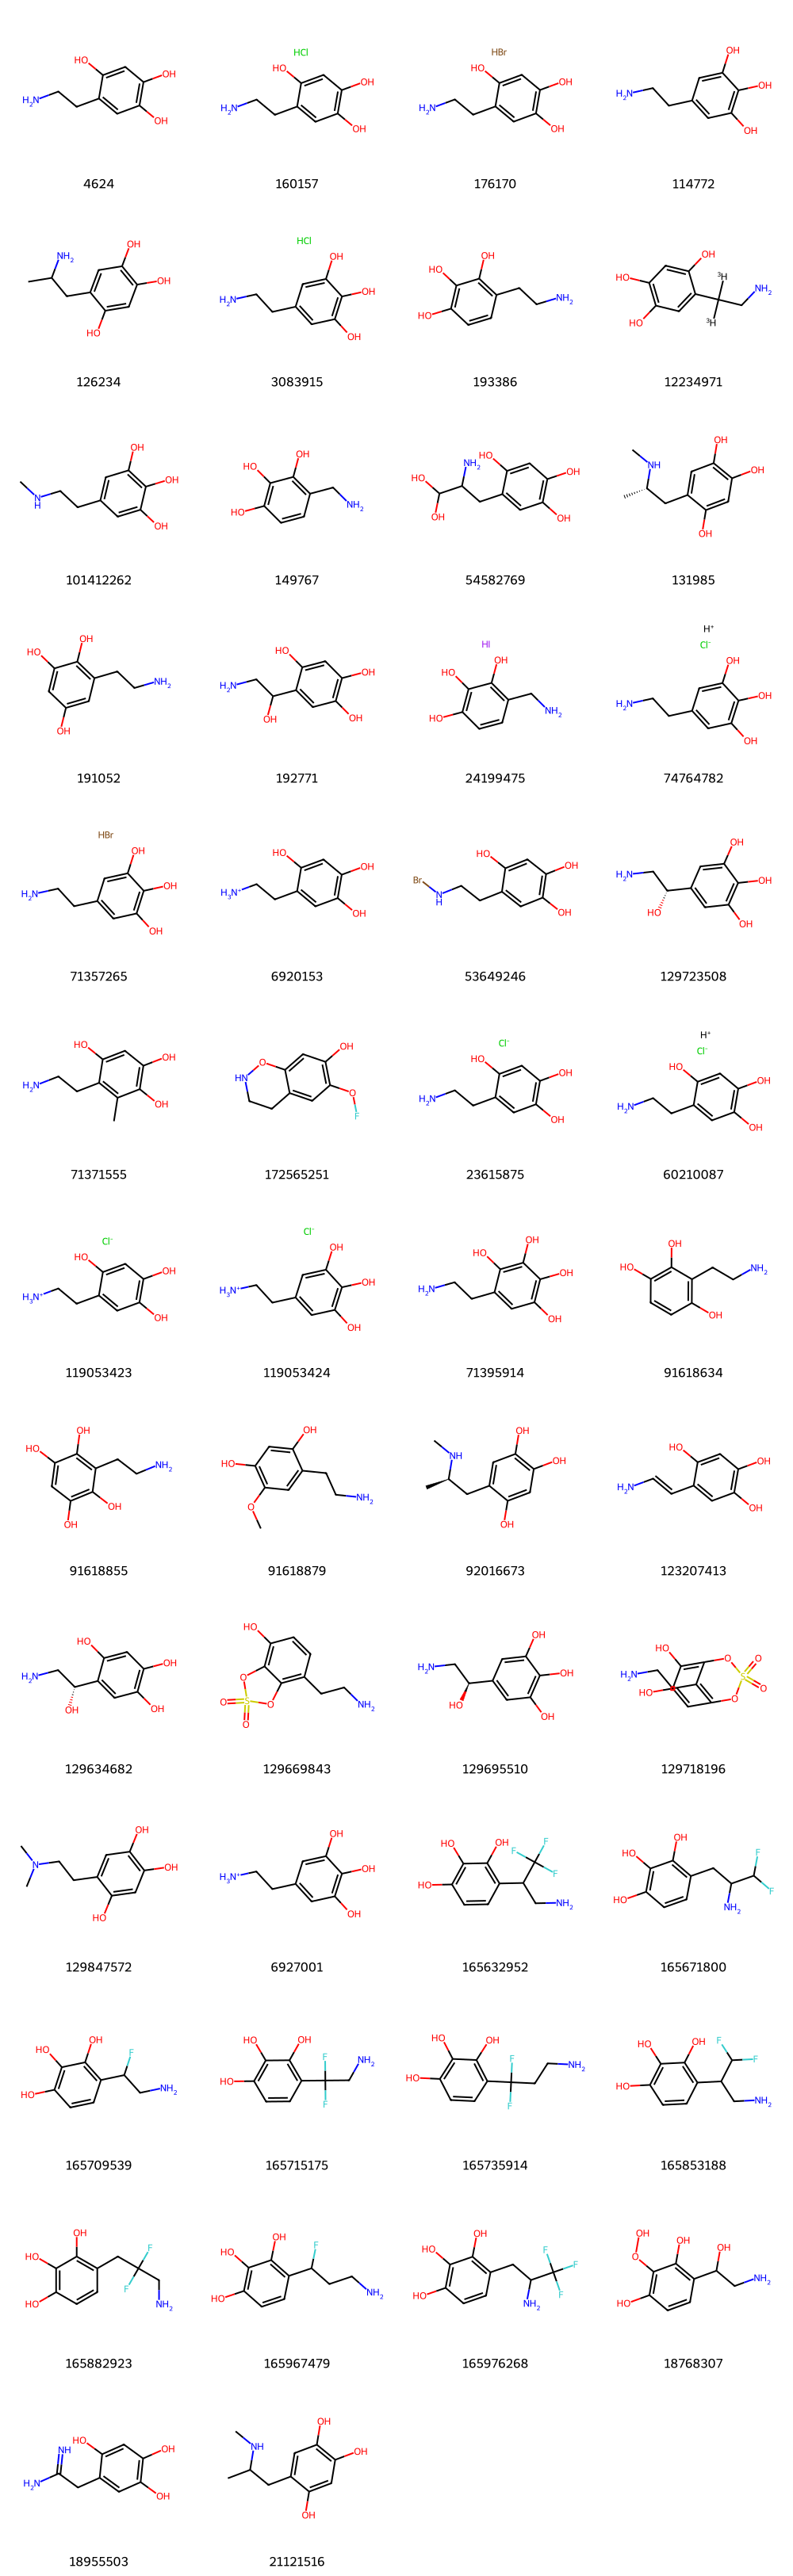

In [40]:
results = pcp.get_compounds(novel_compound, "smiles", searchtype="similarity",listkey_count=50)

sub_smiles = []
for compound in results:
  sub_smiles.append(compound.smiles)

sub_mols = [Chem.MolFromSmiles(smile) for smile in sub_smiles]
legend = [str(compound.cid) for compound in results]

Draw.MolsToGridImage(sub_mols, legends=legend, molsPerRow=4, subImgSize=(250, 250))

## Search for compounds that have the given molecule as a substructure

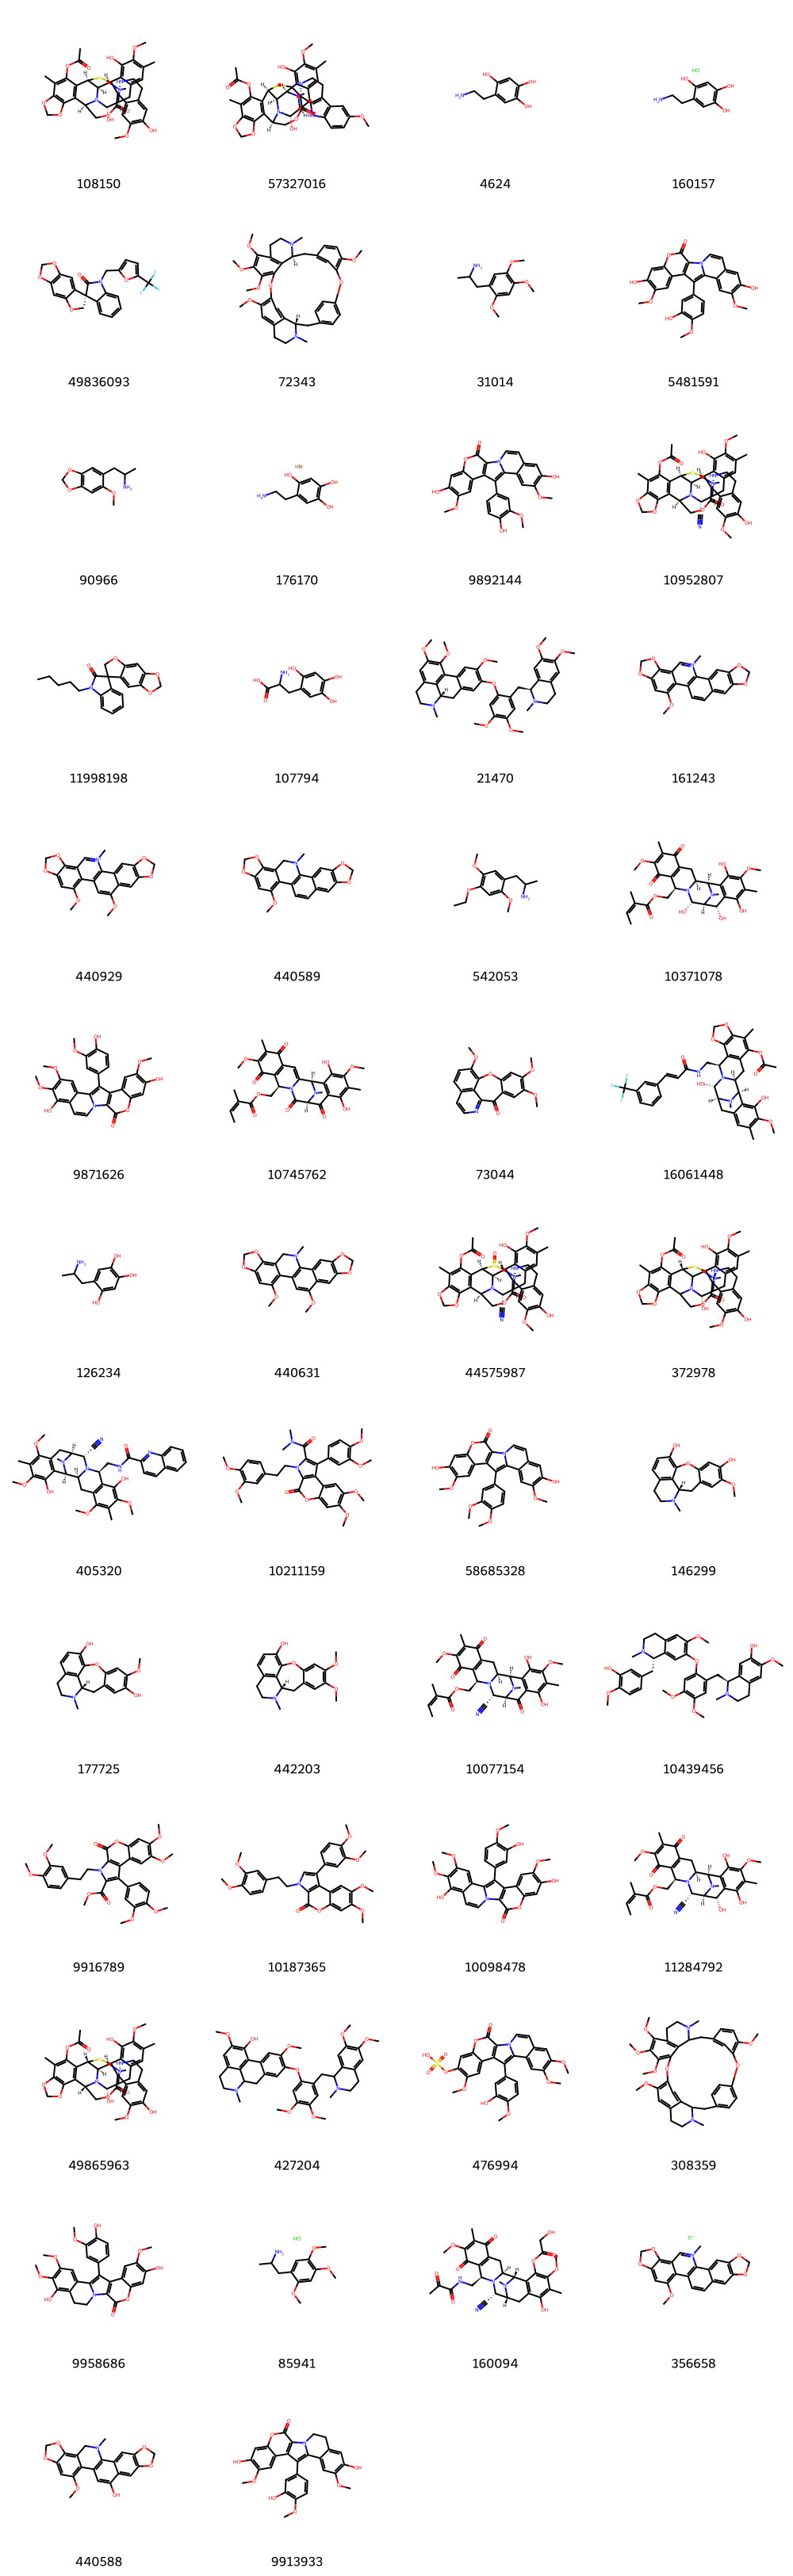

In [43]:
results = pcp.get_compounds(novel_compound, "smiles", searchtype="substructure",listkey_count=50)

sub_smiles = []
for compound in results:
  sub_smiles.append(compound.smiles)

sub_mols = [Chem.MolFromSmiles(smile) for smile in sub_smiles]
legend = [str(compound.cid) for compound in results]

Draw.MolsToGridImage(sub_mols, legends=legend, molsPerRow=4, subImgSize=(250, 250))

## View properties (using the results list from a substructure search)

In [51]:
props_list = ['SMILES', 'MolecularWeight','XLogP', 'TPSA']

results = pcp.get_compounds(novel_compound, "smiles", searchtype="substructure",listkey_count=10)

for i, compound in enumerate(results):
  temp_props = pcp.get_properties(props_list, compound.cid, "cid")
  print(f"Compound {i+1}")
  for key, value in temp_props[0].items():
    print(f"{key}: {value}")
  print("======================================================")

Compound 1
CID: 108150
MolecularWeight: 761.8
SMILES: CC1=CC2=C([C@@H]3[C@@H]4[C@H]5C6=C(C(=C7C(=C6[C@@H](N4[C@H]([C@H](C2)N3C)O)COC(=O)[C@@]8(CS5)C9=CC(=C(C=C9CCN8)O)OC)OCO7)C)OC(=O)C)C(=C1OC)O
XLogP: 3.4
TPSA: 194
Compound 2
CID: 57327016
MolecularWeight: 784.9
SMILES: CC1=CC2=C([C@@H]3[C@@H]4[C@H]5C6=C(C(=C7C(=C6[C@@H](N4[C@H]([C@H](C2)N3C)O)COC(=O)[C@@]8(CS5)C9=C(CCN8)C2=C(N9)C=CC(=C2)OC)OCO7)C)OC(=O)C)C(=C1OC)O
XLogP: 3.9
TPSA: 190
Compound 3
CID: 4624
MolecularWeight: 169.18
SMILES: C1=C(C(=CC(=C1O)O)O)CCN
XLogP: 0.2
TPSA: 86.7
Compound 4
CID: 160157
MolecularWeight: 205.64
SMILES: C1=C(C(=CC(=C1O)O)O)CCN.Cl
TPSA: 86.7
Compound 5
CID: 49836093
MolecularWeight: 429.3
SMILES: C1[C@]2(C3=CC=CC=C3N(C2=O)CC4=CC=C(O4)C(F)(F)F)C5=CC6=C(C=C5O1)OCO6
XLogP: 3.5
TPSA: 61.1
Compound 6
CID: 72343
MolecularWeight: 652.8
SMILES: CN1CCC2=CC(=C3C=C2[C@@H]1CC4=CC=C(C=C4)OC5=C(C=CC(=C5)C[C@H]6C7=C(CCN6C)C(=C(C(=C7O3)OC)OC)OC)OC)OC
XLogP: 6.4
TPSA: 71.1
Compound 7
CID: 31014
MolecularWeight: 225.28
